Aluno: Rodrigo Braz

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

path = r"C:\Users\rodri\Desktop\Atividades\mlp\tpml\data_tp1"


# Carregar o conjunto de dados usando o pandas
df = pd.read_csv(path, header=None)
df.head(5)

# Dividir o DataFrame em treinamento (80%) e teste (20%)
train_df, test_df = train_test_split(df, test_size=0.2)

# Exibir o tamanho dos DataFrames resultantes
train_df_x = train_df.drop(0, axis = 1)
train_df_y = train_df[0]

test_df_x = test_df.drop(0, axis = 1)
test_df_y = test_df[0]

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Número de unidades ocultas: 25
Acurácia: 0.88

Número de unidades ocultas: 50
Acurácia: 0.91

Número de unidades ocultas: 100
Acurácia: 0.906



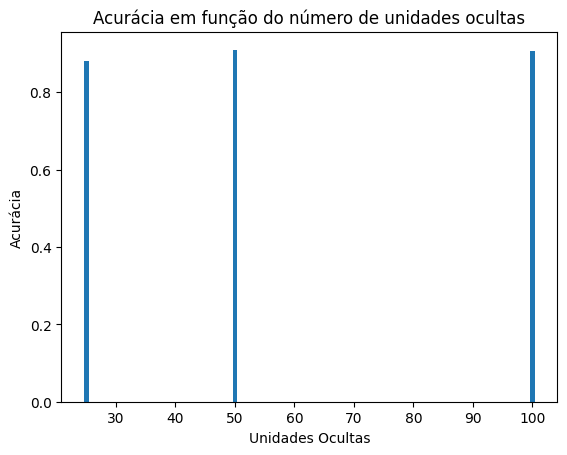

In [4]:

# Padronizar os dados de entrada
scaler = StandardScaler()
train_df_x_scaled = scaler.fit_transform(train_df_x)
test_df_x_scaled = scaler.transform(test_df_x)

# Definir os parâmetros da rede neural
hidden_units = [25, 50, 100]  
learning_rate = 0.001  

# Listas para armazenar os resultados
accuracy_results = []

# Treinar e avaliar a rede neural para cada número de unidades na camada oculta
for units in hidden_units:
    # Criar o modelo da rede neural com a função de ativação sigmoide
    model = MLPClassifier(hidden_layer_sizes=(units,), activation='logistic', learning_rate_init=learning_rate)

    # Treinar o modelo
    model.fit(train_df_x_scaled, train_df_y)

    # Avaliar o modelo
    accuracy = model.score(test_df_x_scaled, test_df_y)
    
    # Armazenar a acurácia
    accuracy_results.append(accuracy)
    # Imprimir os resultados
    print(f"Número de unidades ocultas: {units}")
    print(f"Acurácia: {accuracy}")
    print()
    
# Configurar o gráfico de barras
plt.bar(hidden_units, accuracy_results)
plt.xlabel('Unidades Ocultas')
plt.ylabel('Acurácia')
plt.title('Acurácia em função do número de unidades ocultas')

# Exibir o gráfico
plt.show()


Gráfico mostra o erro nos dados de teste, erro esperado.

Agora vamos treinar o modelo com 10 epocas, apenas para avaliar o erro empírico

Número de unidades ocultas: 25
Acurácia: 0.854

Número de unidades ocultas: 50
Acurácia: 0.876

Número de unidades ocultas: 100
Acurácia: 0.894



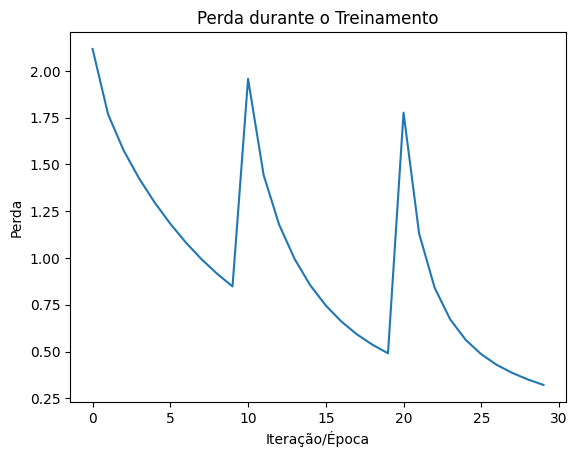

In [5]:
loss_history = []
num_epochs = 10 

# Treinar e avaliar a rede neural para cada número de unidades ocultas
for units in hidden_units:
    model = MLPClassifier(hidden_layer_sizes=(units,), activation='logistic', learning_rate_init=learning_rate)

    # Treinar o modelo
    for epoch in range(num_epochs):
        model.partial_fit(train_df_x_scaled, train_df_y, classes=np.unique(train_df_y))
        loss = model.loss_
        loss_history.append(loss)
    
    # Avaliar o modelo
    accuracy = model.score(test_df_x_scaled, test_df_y)
    
    # Imprimir os resultados
    print(f"Número de unidades ocultas: {units}")
    print(f"Acurácia: {accuracy}")
    print()

# Plotar o histórico de perda
plt.plot(loss_history)
plt.xlabel('Iteração/Época')
plt.ylabel('Perda')
plt.title('Perda durante o Treinamento')
plt.show()


Com esse modelo, podemos ver a acurácia com diferentes número de camadas ocultas. Bem parecida a acurácia do modelo mesmo variando bastante o número de camadas, utilizando uma taxa de aprendizado bem baixa. Agora vamos variar a taxa de aprendizado para ver como se comporta. Logo, com uma taxa de aprendizagem baixa, pra esse modelo não sofreu muita alterção mesmo com mudanças grandes no número de unidades ocultas.


Número de unidades ocultas: 25
Taxa de aprendizagem: 0.5
Acurácia: 0.892

Número de unidades ocultas: 25
Taxa de aprendizagem: 1
Acurácia: 0.891

Número de unidades ocultas: 25
Taxa de aprendizagem: 10
Acurácia: 0.888

Número de unidades ocultas: 50
Taxa de aprendizagem: 0.5
Acurácia: 0.889

Número de unidades ocultas: 50
Taxa de aprendizagem: 1
Acurácia: 0.905

Número de unidades ocultas: 50
Taxa de aprendizagem: 10
Acurácia: 0.869

Número de unidades ocultas: 100
Taxa de aprendizagem: 0.5
Acurácia: 0.905

Número de unidades ocultas: 100
Taxa de aprendizagem: 1
Acurácia: 0.891

Número de unidades ocultas: 100
Taxa de aprendizagem: 10
Acurácia: 0.888



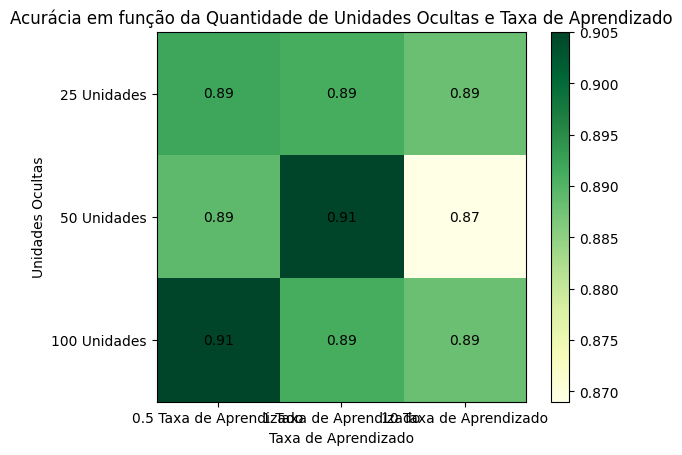

In [6]:
# Padronizar os dados de entrada]

scaler = StandardScaler()
train_df_x_scaled = scaler.fit_transform(train_df_x)
test_df_x_scaled = scaler.transform(test_df_x)

# Agora vamos variar tanto a quantidade de unidades na camada oculta, quanto a taxa de aprendizado
hidden_units = [25, 50, 100]  
learning_rates = [0.5, 1, 10]  

# Listas para armazenar as acurácias
accuracy_results = np.zeros((len(hidden_units), len(learning_rates)))

# Treinar e avaliar a rede neural para cada número de unidades na camada oculta e taxa de aprendizado
for i, units in enumerate(hidden_units):
    for j, rate in enumerate(learning_rates):
        # Criar o modelo da rede neural
        model = MLPClassifier(hidden_layer_sizes=(units,), learning_rate_init=rate)

        # Treinar o modelo
        model.fit(train_df_x_scaled, train_df_y)

        # Avaliar o modelo
        accuracy = model.score(test_df_x_scaled, test_df_y)

        # Armazenar a acurácia
        accuracy_results[i, j] = accuracy
        
        print(f"Número de unidades ocultas: {units}")
        print(f"Taxa de aprendizagem: {rate}")
        print(f"Acurácia: {accuracy}")
        print()

# Configurar os rótulos para os eixos x e y
x_labels = [f"{units} Unidades" for units in hidden_units]
y_labels = [f"{rate} Taxa de Aprendizado" for rate in learning_rates]

# Criar o gráfico de barras
fig, ax = plt.subplots()
im = ax.imshow(accuracy_results, cmap="YlGn")

# Adicionar as legendas dos eixos
ax.set_xticks(np.arange(len(learning_rates)))
ax.set_yticks(np.arange(len(hidden_units)))
ax.set_xticklabels(y_labels)
ax.set_yticklabels(x_labels)

# Adicionar valores nos blocos do gráfico
for i in range(len(hidden_units)):
    for j in range(len(learning_rates)):
        text = ax.text(j, i, "{:.2f}".format(accuracy_results[i, j]), ha="center", va="center", color="black")

# Configurar os rótulos do gráfico
ax.set_title("Acurácia em função da Quantidade de Unidades Ocultas e Taxa de Aprendizado")
ax.set_xlabel("Taxa de Aprendizado")
ax.set_ylabel("Unidades Ocultas")

# Exibir a barra de cores
cbar = ax.figure.colorbar(im, ax=ax)

# Exibir o gráfico
plt.show()

Agora vamos avaliar os erros nos dados de treino.

Número de unidades ocultas: 25
Taxa de aprendizagem: 0.5
Acurácia nos dados de teste: 0.903
Erro nos dados de treino: 0.0044999999999999485

Número de unidades ocultas: 25
Taxa de aprendizagem: 1
Acurácia nos dados de teste: 0.856
Erro nos dados de treino: 0.035250000000000004

Número de unidades ocultas: 25
Taxa de aprendizagem: 10
Acurácia nos dados de teste: 0.866
Erro nos dados de treino: 0.048250000000000015

Número de unidades ocultas: 50
Taxa de aprendizagem: 0.5
Acurácia nos dados de teste: 0.913
Erro nos dados de treino: 0.004750000000000032

Número de unidades ocultas: 50
Taxa de aprendizagem: 1
Acurácia nos dados de teste: 0.884
Erro nos dados de treino: 0.019499999999999962

Número de unidades ocultas: 50
Taxa de aprendizagem: 10
Acurácia nos dados de teste: 0.881
Erro nos dados de treino: 0.03749999999999998

Número de unidades ocultas: 100
Taxa de aprendizagem: 0.5
Acurácia nos dados de teste: 0.887
Erro nos dados de treino: 0.015249999999999986

Número de unidades oculta

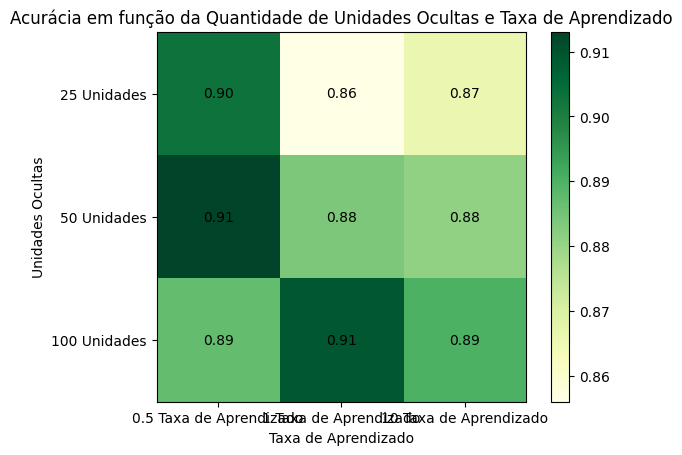

Número de unidades ocultas: 25
Taxa de aprendizagem: 0.5
Erro nos dados de treino: 0.0044999999999999485

Número de unidades ocultas: 25
Taxa de aprendizagem: 1
Erro nos dados de treino: 0.035250000000000004

Número de unidades ocultas: 25
Taxa de aprendizagem: 10
Erro nos dados de treino: 0.048250000000000015

Número de unidades ocultas: 50
Taxa de aprendizagem: 0.5
Erro nos dados de treino: 0.004750000000000032

Número de unidades ocultas: 50
Taxa de aprendizagem: 1
Erro nos dados de treino: 0.019499999999999962

Número de unidades ocultas: 50
Taxa de aprendizagem: 10
Erro nos dados de treino: 0.03749999999999998

Número de unidades ocultas: 100
Taxa de aprendizagem: 0.5
Erro nos dados de treino: 0.015249999999999986

Número de unidades ocultas: 100
Taxa de aprendizagem: 1
Erro nos dados de treino: 0.01200000000000001

Número de unidades ocultas: 100
Taxa de aprendizagem: 10
Erro nos dados de treino: 0.03125



In [7]:
# Listas para armazenar as acurácias e erros
accuracy_results = np.zeros((len(hidden_units), len(learning_rates)))
train_errors = np.zeros((len(hidden_units), len(learning_rates)))

# Treinar e avaliar a rede neural para cada número de unidades na camada oculta e taxa de aprendizado
for i, units in enumerate(hidden_units):
    for j, rate in enumerate(learning_rates):
        # Criar o modelo da rede neural
        model = MLPClassifier(hidden_layer_sizes=(units,), learning_rate_init=rate)

        # Treinar o modelo
        model.fit(train_df_x_scaled, train_df_y)

        # Avaliar o modelo nos dados de teste
        accuracy = model.score(test_df_x_scaled, test_df_y)

        # Calcular a acurácia nos dados de treino
        train_accuracy = model.score(train_df_x_scaled, train_df_y)

        # Calcular o erro nos dados de treino
        train_error = 1 - train_accuracy

        # Armazenar a acurácia e o erro
        accuracy_results[i, j] = accuracy
        train_errors[i, j] = train_error

        print(f"Número de unidades ocultas: {units}")
        print(f"Taxa de aprendizagem: {rate}")
        print(f"Acurácia nos dados de teste: {accuracy}")
        print(f"Erro nos dados de treino: {train_error}")
        print()

# Configurar os rótulos para os eixos x e y
x_labels = [f"{units} Unidades" for units in hidden_units]
y_labels = [f"{rate} Taxa de Aprendizado" for rate in learning_rates]

# Criar o gráfico de barras
fig, ax = plt.subplots()
im = ax.imshow(accuracy_results, cmap="YlGn")

# Adicionar as legendas dos eixos
ax.set_xticks(np.arange(len(learning_rates)))
ax.set_yticks(np.arange(len(hidden_units)))
ax.set_xticklabels(y_labels)
ax.set_yticklabels(x_labels)

# Adicionar valores nos blocos do gráfico
for i in range(len(hidden_units)):
    for j in range(len(learning_rates)):
        text = ax.text(j, i, "{:.2f}".format(accuracy_results[i, j]), ha="center", va="center", color="black")

# Configurar os rótulos do gráfico
ax.set_title("Acurácia em função da Quantidade de Unidades Ocultas e Taxa de Aprendizado")
ax.set_xlabel("Taxa de Aprendizado")
ax.set_ylabel("Unidades Ocultas")

# Exibir a barra de cores
cbar = ax.figure.colorbar(im, ax=ax)

# Exibir o gráfico
plt.show()

# Exibir os erros nos dados de treino
for i, units in enumerate(hidden_units):
    for j, rate in enumerate(learning_rates):
        print(f"Número de unidades ocultas: {units}")
        print(f"Taxa de aprendizagem: {rate}")
        print(f"Erro nos dados de treino: {train_errors[i, j]}")
        print()


Para Esse cenário, podemos notar que o modelo que se deu melhor foi o de 100 unidades ocultas com a taxa de aprendizado baixa, um comportamento curioso como podemos notar no gráfico.

Vamos comparar agora os resultados com o 1. Gradient Descent



Número de unidades ocultas: 25
Taxa de aprendizagem: 0.5
Acurácia: 0.876

Número de unidades ocultas: 25
Taxa de aprendizagem: 1
Acurácia: 0.237

Número de unidades ocultas: 25
Taxa de aprendizagem: 10
Acurácia: 0.121

Número de unidades ocultas: 50
Taxa de aprendizagem: 0.5
Acurácia: 0.889

Número de unidades ocultas: 50
Taxa de aprendizagem: 1
Acurácia: 0.139

Número de unidades ocultas: 50
Taxa de aprendizagem: 10
Acurácia: 0.035

Número de unidades ocultas: 100
Taxa de aprendizagem: 0.5
Acurácia: 0.914

Número de unidades ocultas: 100
Taxa de aprendizagem: 1
Acurácia: 0.242

Número de unidades ocultas: 100
Taxa de aprendizagem: 10
Acurácia: 0.035



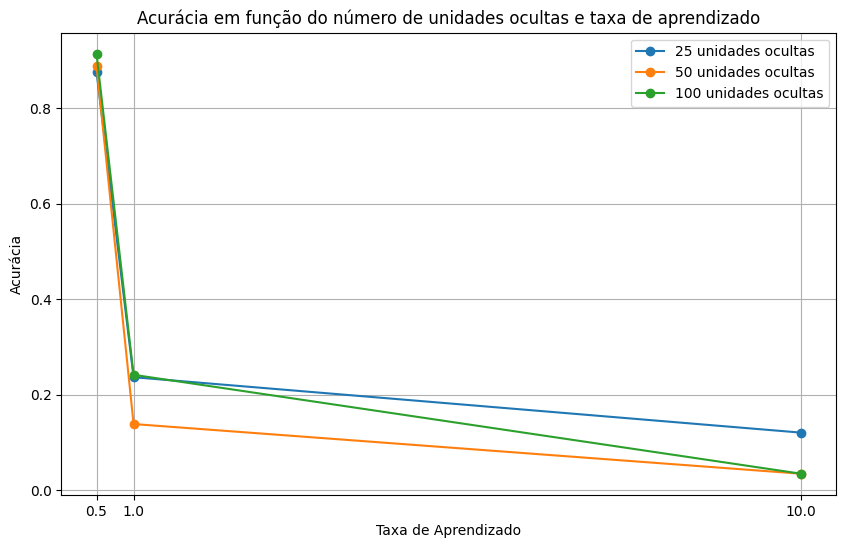

In [8]:

# Padronizar os dados de entrada
scaler = StandardScaler()
train_df_x_scaled = scaler.fit_transform(train_df_x)
test_df_x_scaled = scaler.transform(test_df_x)

# Agora vamos variar tanto a quantidade de unidades na camada oculta, quanto a taxa de aprendizado
hidden_units = [25, 50, 100]  
learning_rates = [0.5, 1, 10]  

# Listas para armazenar as acurácias
accuracy_results = np.zeros((len(hidden_units), len(learning_rates)))

# Treinar e avaliar a rede neural para cada número de unidades na camada oculta e taxa de aprendizado
for i, units in enumerate(hidden_units):
    for j, rate in enumerate(learning_rates):
        # Criar o modelo da rede neural
        model = MLPClassifier(hidden_layer_sizes=(units,), solver='sgd', learning_rate='constant', learning_rate_init=rate,
                              batch_size=train_df_x_scaled.shape[0])

        # Treinar o modelo
        model.fit(train_df_x_scaled, train_df_y)

        # Avaliar o modelo
        accuracy = model.score(test_df_x_scaled, test_df_y)

        # Armazenar a acurácia
        accuracy_results[i, j] = accuracy
        print(f"Número de unidades ocultas: {units}")
        print(f"Taxa de aprendizagem: {rate}")
        print(f"Acurácia: {accuracy}")
        print()


# Plotar o gráfico das acurácias
plt.figure(figsize=(10, 6))
for i, units in enumerate(hidden_units):
    plt.plot(learning_rates, accuracy_results[i], marker='o', label=f'{units} unidades ocultas')

plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Acurácia')
plt.title('Acurácia em função do número de unidades ocultas e taxa de aprendizado')
plt.xticks(learning_rates)
plt.legend()
plt.grid(True)
plt.show()


Agora vamos avaliar os dados de treino como de costume.

Número de unidades ocultas: 25
Taxa de aprendizagem: 0.5
Acurácia: 0.856
Erro nos dados de treino: 0.7612772890123375

Número de unidades ocultas: 25
Taxa de aprendizagem: 1
Acurácia: 0.114
Erro nos dados de treino: 29.978474998378708

Número de unidades ocultas: 25
Taxa de aprendizagem: 10
Acurácia: 0.126
Erro nos dados de treino: 1.0222630449082435e+24

Número de unidades ocultas: 50
Taxa de aprendizagem: 0.5
Acurácia: 0.738
Erro nos dados de treino: 5.080289485218708

Número de unidades ocultas: 50
Taxa de aprendizagem: 1
Acurácia: 0.215
Erro nos dados de treino: 31.320879086535758

Número de unidades ocultas: 50
Taxa de aprendizagem: 10
Acurácia: 0.04
Erro nos dados de treino: 1.235629287666641e+24

Número de unidades ocultas: 100
Taxa de aprendizagem: 0.5
Acurácia: 0.868
Erro nos dados de treino: 0.3597021176361913

Número de unidades ocultas: 100
Taxa de aprendizagem: 1
Acurácia: 0.299
Erro nos dados de treino: 31.307692562701657

Número de unidades ocultas: 100
Taxa de aprendiza

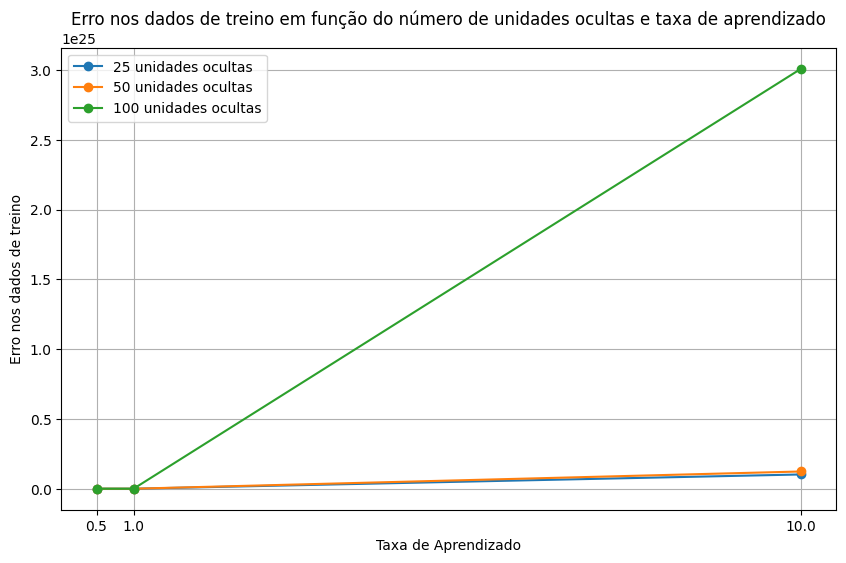

In [9]:
# Listas para armazenar as acurácias e erros
accuracy_results = np.zeros((len(hidden_units), len(learning_rates)))
train_errors = np.zeros((len(hidden_units), len(learning_rates)))

# Treinar e avaliar a rede neural para cada número de unidades na camada oculta e taxa de aprendizado
for i, units in enumerate(hidden_units):
    for j, rate in enumerate(learning_rates):
        # Criar o modelo da rede neural
        model = MLPClassifier(hidden_layer_sizes=(units,), solver='sgd', learning_rate='constant', learning_rate_init=rate,
                              batch_size=train_df_x_scaled.shape[0])

        # Treinar o modelo
        model.fit(train_df_x_scaled, train_df_y)

        # Avaliar o modelo
        accuracy = model.score(test_df_x_scaled, test_df_y)

        # Armazenar a acurácia
        accuracy_results[i, j] = accuracy
        
        # Calcular o erro nos dados de treino
        train_loss = model.loss_curve_

        # Armazenar o erro
        train_errors[i, j] = train_loss[-1]

        print(f"Número de unidades ocultas: {units}")
        print(f"Taxa de aprendizagem: {rate}")
        print(f"Acurácia: {accuracy}")
        print(f"Erro nos dados de treino: {train_loss[-1]}")
        print()

# Plotar o gráfico dos erros nos dados de treino
plt.figure(figsize=(10, 6))
for i, units in enumerate(hidden_units):
    plt.plot(learning_rates, train_errors[i], marker='o', label=f'{units} unidades ocultas')

plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Erro nos dados de treino')
plt.title('Erro nos dados de treino em função do número de unidades ocultas e taxa de aprendizado')
plt.xticks(learning_rates)
plt.legend()
plt.grid(True)
plt.show()


Podemos notar que usando o gradient descent, quando se aumenta a learing rate a acurácia decai muito.

Agora vamos testar o: 2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.



Número de unidades ocultas: 25
Acurácia: 0.903

Número de unidades ocultas: 50
Acurácia: 0.921

Número de unidades ocultas: 100
Acurácia: 0.919



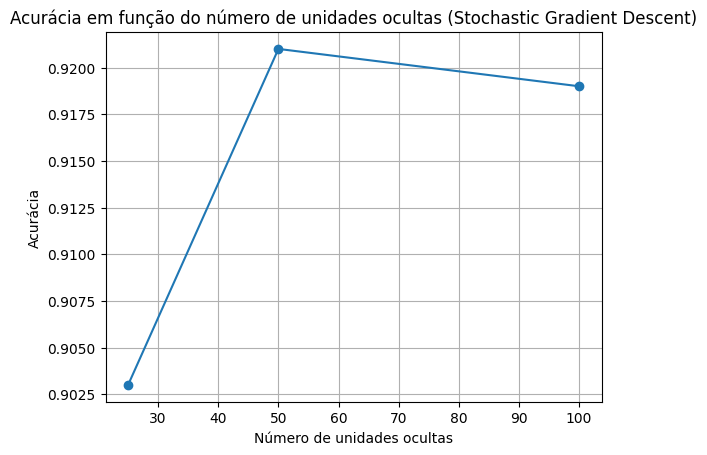

In [10]:

path = r"C:\Users\rodri\Desktop\Atividades\mlp\tpml\data_tp1"

# Carregar o conjunto de dados usando o pandas
df = pd.read_csv(path, header=None)

# Dividir o DataFrame em treinamento (80%) e teste (20%)
train_df, test_df = train_test_split(df, test_size=0.2)

# Separar os dados de treinamento em features (x) e rótulos (y)
train_df_x = train_df.drop(0, axis=1)
train_df_y = train_df[0]

# Separar os dados de teste em features (x) e rótulos (y)
test_df_x = test_df.drop(0, axis=1)
test_df_y = test_df[0]

# Normalizar os dados de entrada
scaler = StandardScaler()
train_df_x_scaled = scaler.fit_transform(train_df_x)
test_df_x_scaled = scaler.transform(test_df_x)

# Agora vamos variar tanto a quantidade de unidades na camada oculta, quanto o uso do SGD
hidden_units = [25, 50, 100]
learning_rates = [0.5, 1, 10]  

# Listas para armazenar as acurácias
accuracy_results = np.zeros(len(hidden_units))

# Treinar e avaliar a rede neural para cada número de unidades na camada oculta

for i, units in enumerate(hidden_units):
    # Criar o modelo da rede neural com SGD
    model = MLPClassifier(hidden_layer_sizes=(units,), solver='sgd', learning_rate='constant', learning_rate_init=0.001,
                          batch_size=1, max_iter=5000, random_state=42)

    # Treinar o modelo
    model.fit(train_df_x_scaled, train_df_y)

    # Avaliar o modelo
    accuracy = model.score(test_df_x_scaled, test_df_y)

    # Armazenar a acurácia
    accuracy_results[i] = accuracy
    print(f"Número de unidades ocultas: {units}")
    print(f"Acurácia: {accuracy}")
    print()
    
# Plotar o gráfico das acurácias
plt.plot(hidden_units, accuracy_results, marker='o')
plt.xlabel('Número de unidades ocultas')
plt.ylabel('Acurácia')
plt.title('Acurácia em função do número de unidades ocultas (Stochastic Gradient Descent)')
plt.grid(True)
plt.show()


Novamente, rodar para saber o erro empírico...

Número de unidades ocultas: 25
Acurácia: 0.903
Erro nos dados de treino: 0.015381360537949598

Número de unidades ocultas: 50
Acurácia: 0.921
Erro nos dados de treino: 0.01516673308365922

Número de unidades ocultas: 100
Acurácia: 0.919
Erro nos dados de treino: 0.016184540157292496



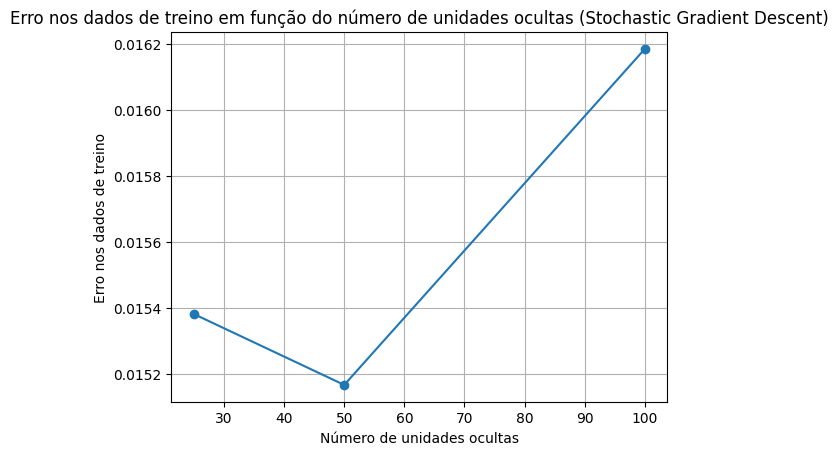

In [11]:
# Listas para armazenar as acurácias e erros
accuracy_results = np.zeros(len(hidden_units))
train_errors = np.zeros(len(hidden_units))

# Treinar e avaliar a rede neural para cada número de unidades na camada oculta
for i, units in enumerate(hidden_units):
    # Criar o modelo da rede neural com SGD
    model = MLPClassifier(hidden_layer_sizes=(units,), solver='sgd', learning_rate='constant', learning_rate_init=0.001,
                          batch_size=1, max_iter=5000, random_state=42)

    # Treinar o modelo
    model.fit(train_df_x_scaled, train_df_y)

    # Avaliar o modelo
    accuracy = model.score(test_df_x_scaled, test_df_y)

    # Armazenar a acurácia
    accuracy_results[i] = accuracy
    
    # Calcular o erro nos dados de treino
    train_loss = model.loss_curve_

    # Armazenar o erro
    train_errors[i] = train_loss[-1]

    print(f"Número de unidades ocultas: {units}")
    print(f"Acurácia: {accuracy}")
    print(f"Erro nos dados de treino: {train_loss[-1]}")
    print()
    

# Plotar o gráfico dos erros nos dados de treino
plt.plot(hidden_units, train_errors, marker='o')
plt.xlabel('Número de unidades ocultas')
plt.ylabel('Erro nos dados de treino')
plt.title('Erro nos dados de treino em função do número de unidades ocultas (Stochastic Gradient Descent)')
plt.grid(True)
plt.show()


A acurácia do SGD aumentou de forma bem sucinta ao aumento da quantidade de unidades ocultas.


Agora vamos testar o: 3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).





Número de unidades ocultas: 25
Tamanho do batch: 10
Acurácia: 0.914

Número de unidades ocultas: 25
Tamanho do batch: 50
Acurácia: 0.914

Número de unidades ocultas: 50
Tamanho do batch: 10
Acurácia: 0.914

Número de unidades ocultas: 50
Tamanho do batch: 50
Acurácia: 0.912

Número de unidades ocultas: 100
Tamanho do batch: 10
Acurácia: 0.91

Número de unidades ocultas: 100
Tamanho do batch: 50
Acurácia: 0.905



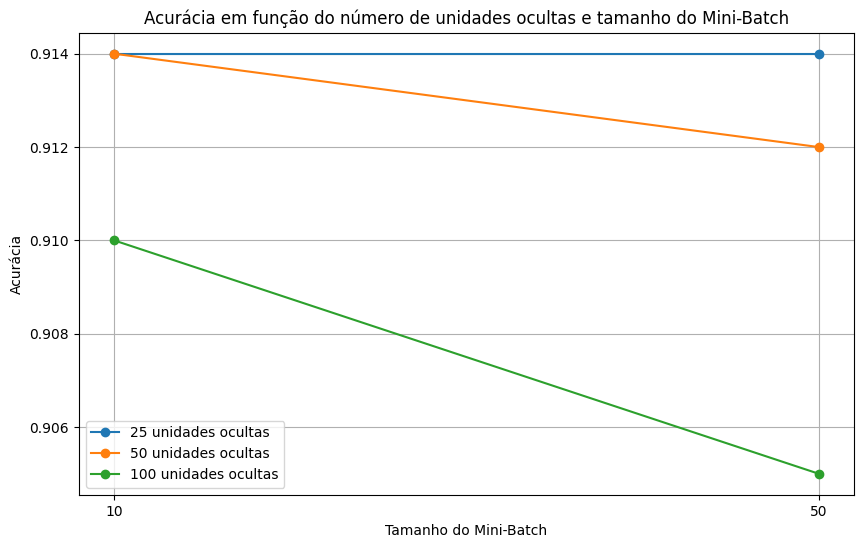

In [12]:


#Reinstanciei os dados, pois por algum motivo os reutilizando estava dando erro de segmentação de memória.
path = r"C:\Users\rodri\Desktop\Atividades\mlp\tpml\data_tp1"


# Carregar o conjunto de dados usando o pandas
df = pd.read_csv(path, header=None)

# Dividir o DataFrame em treinamento (80%) e teste (20%)
train_df, test_df = train_test_split(df, test_size=0.2)

# Separar os dados de treinamento em features (x) e rótulos (y)
train_df_x = train_df.drop(0, axis=1)
train_df_y = train_df[0]

# Separar os dados de teste em features (x) e rótulos (y)
test_df_x = test_df.drop(0, axis=1)
test_df_y = test_df[0]

# Normalizar os dados de entrada
scaler = StandardScaler()
train_df_x_scaled = scaler.fit_transform(train_df_x)
test_df_x_scaled = scaler.transform(test_df_x)

# Agora vamos variar tanto a quantidade de unidades na camada oculta, quanto o tamanho do mini-batch
hidden_units = [25, 50, 100]  # Número de unidades na camada oculta

batch_sizes = [10, 50] 

# Listas para armazenar as acurácias
accuracy_results = np.zeros((len(hidden_units), len(batch_sizes)))

# Treinar e avaliar a rede neural para cada número de unidades na camada oculta e tamanho do mini-batch
for i, units in enumerate(hidden_units):
    for j, batch_size in enumerate(batch_sizes):
        # Criar o modelo da rede neural
        model = MLPClassifier(hidden_layer_sizes=(units,), solver='sgd', learning_rate='constant', learning_rate_init=0.001,
                              batch_size=batch_size, max_iter=5000, random_state=42)

        # Treinar o modelo
        model.fit(train_df_x_scaled, train_df_y)

        # Avaliar o modelo
        accuracy = model.score(test_df_x_scaled, test_df_y)

        # Armazenar a acurácia
        accuracy_results[i, j] = accuracy
        print(f"Número de unidades ocultas: {units}")
        print(f"Tamanho do batch: {batch_size}")
        print(f"Acurácia: {accuracy}")
        print()

# Plotar o gráfico das acurácias
plt.figure(figsize=(10, 6))
for i, units in enumerate(hidden_units):
    plt.plot(batch_sizes, accuracy_results[i], marker='o', label=f'{units} unidades ocultas')

plt.xlabel('Tamanho do Mini-Batch')
plt.ylabel('Acurácia')
plt.title('Acurácia em função do número de unidades ocultas e tamanho do Mini-Batch')
plt.xticks(batch_sizes)
plt.legend()
plt.grid(True)
plt.show()


Calculando o erro empírico agora...

Número de unidades ocultas: 25
Tamanho do batch: 10
Acurácia: 0.914
Erro nos dados de treino: 0.00489854064928328

Número de unidades ocultas: 25
Tamanho do batch: 50
Acurácia: 0.914
Erro nos dados de treino: 0.012097192948577909

Número de unidades ocultas: 50
Tamanho do batch: 10
Acurácia: 0.914
Erro nos dados de treino: 0.004932260170168599

Número de unidades ocultas: 50
Tamanho do batch: 50
Acurácia: 0.912
Erro nos dados de treino: 0.01071930746139968

Número de unidades ocultas: 100
Tamanho do batch: 10
Acurácia: 0.91
Erro nos dados de treino: 0.0051393144745721965

Número de unidades ocultas: 100
Tamanho do batch: 50
Acurácia: 0.905
Erro nos dados de treino: 0.010603893717342206



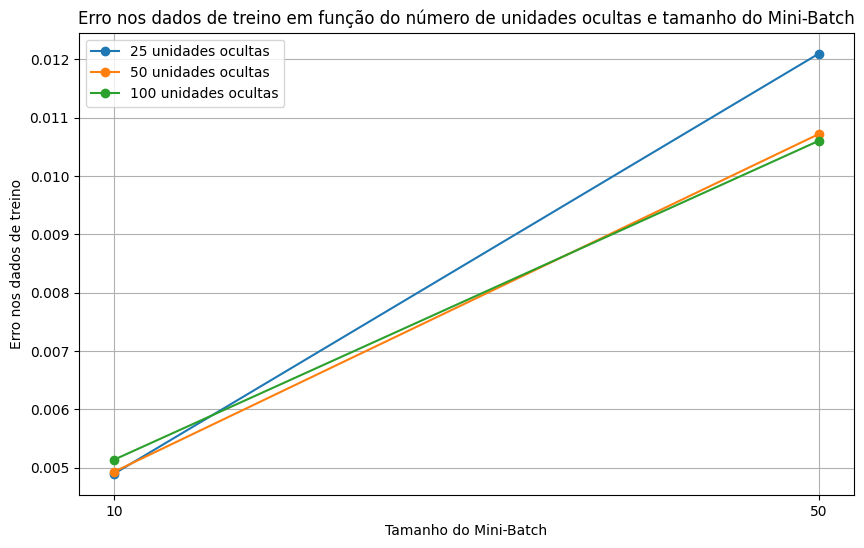

In [13]:
# Listas para armazenar as acurácias e erros
accuracy_results = np.zeros((len(hidden_units), len(batch_sizes)))
train_errors = np.zeros((len(hidden_units), len(batch_sizes)))

# Treinar e avaliar a rede neural para cada número de unidades na camada oculta e tamanho do mini-batch
for i, units in enumerate(hidden_units):
    for j, batch_size in enumerate(batch_sizes):
        # Criar o modelo da rede neural
        model = MLPClassifier(hidden_layer_sizes=(units,), solver='sgd', learning_rate='constant', learning_rate_init=0.001,
                              batch_size=batch_size, max_iter=5000, random_state=42)

        # Treinar o modelo
        model.fit(train_df_x_scaled, train_df_y)

        # Avaliar o modelo
        accuracy = model.score(test_df_x_scaled, test_df_y)

        # Armazenar a acurácia
        accuracy_results[i, j] = accuracy

        # Calcular o erro nos dados de treino
        train_loss = model.loss_curve_

        # Armazenar o erro
        train_errors[i, j] = train_loss[-1]

        print(f"Número de unidades ocultas: {units}")
        print(f"Tamanho do batch: {batch_size}")
        print(f"Acurácia: {accuracy}")
        print(f"Erro nos dados de treino: {train_loss[-1]}")
        print()



# Plotar o gráfico dos erros nos dados de treino
plt.figure(figsize=(10, 6))
for i, units in enumerate(hidden_units):
    plt.plot(batch_sizes, train_errors[i], marker='o', label=f'{units} unidades ocultas')

plt.xlabel('Tamanho do Mini-Batch')
plt.ylabel('Erro nos dados de treino')
plt.title('Erro nos dados de treino em função do número de unidades ocultas e tamanho do Mini-Batch')
plt.xticks(batch_sizes)
plt.legend()
plt.grid(True)
plt.show()


A acurácia do Mini Batch, se comparado aos outros, é o que menos sofre alteração de acurácia com o ajuste da quantidade de unidades ocultas e alterações no batch
